File: drmapan.wav
Sample rate: 22050 Hz
Channels: 4
Frames (samples per channel): 105507
Duration: 4.784898 s
Max amplitude: 0.5157470703125
Min amplitude: -0.483001708984375


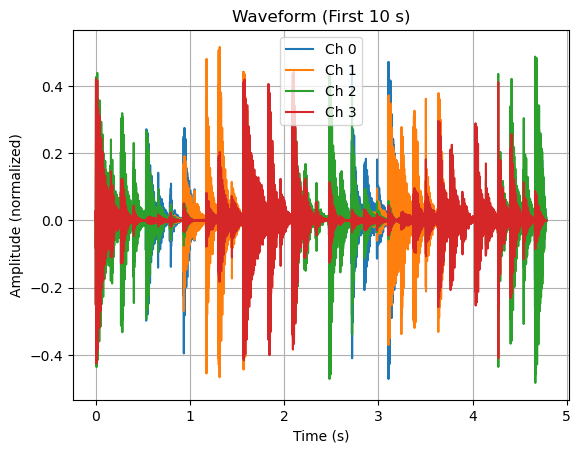

(array([[ 0.0000000e+00,  0.0000000e+00,  1.0955811e-02,  1.0955811e-02],
        [ 0.0000000e+00,  0.0000000e+00,  1.2969971e-02,  1.2969971e-02],
        [ 0.0000000e+00,  0.0000000e+00,  1.3214111e-02,  1.3214111e-02],
        ...,
        [-9.1552734e-05,  0.0000000e+00, -9.1552734e-05,  0.0000000e+00],
        [-6.1035156e-05,  0.0000000e+00, -6.1035156e-05,  0.0000000e+00],
        [-3.0517578e-05,  0.0000000e+00, -3.0517578e-05,  0.0000000e+00]],
       shape=(105507, 4), dtype=float32),
 22050)

In [9]:
import wave
import numpy as np
import matplotlib.pyplot as plt

def analyze_wav(path: str, max_plot_seconds: float = 10.0):
    with wave.open(path, "rb") as wf:
        n_channels = wf.getnchannels()
        sampwidth  = wf.getsampwidth()   # bytes per sample
        fs         = wf.getframerate()
        frames     = wf.getnframes()
        raw        = wf.readframes(frames)

    dtype_map = {1: np.uint8, 2: np.int16, 4: np.int32}
    if sampwidth not in dtype_map:
        raise ValueError(f"Unsupported sample width: {sampwidth} bytes (supports 8/16/32-bit PCM WAV)")

    audio = np.frombuffer(raw, dtype=dtype_map[sampwidth])

    # 8-bit PCM is unsigned; center it
    if sampwidth == 1:
        audio = audio.astype(np.int16) - 128

    audio = audio.reshape(-1, n_channels).astype(np.float32)

    # Normalize to ~[-1, 1]
    max_val = float(2 ** (8 * sampwidth - 1))
    audio /= max_val

    duration = frames / fs
    max_amp = float(np.max(audio))
    min_amp = float(np.min(audio))

    print(f"File: {path}")
    print(f"Sample rate: {fs} Hz")
    print(f"Channels: {n_channels}")
    print(f"Frames (samples per channel): {frames}")
    print(f"Duration: {duration:.6f} s")
    print(f"Max amplitude: {max_amp}")
    print(f"Min amplitude: {min_amp}")

    # Plot first N seconds
    n_plot = min(frames, int(max_plot_seconds * fs))
    t = np.arange(n_plot) / fs

    plt.figure()
    if n_channels == 1:
        plt.plot(t, audio[:n_plot, 0])
        plt.title("Waveform (Mono)")
    else:
        for ch in range(n_channels):
            plt.plot(t, audio[:n_plot, ch], label=f"Ch {ch}")
        plt.title(f"Waveform (First {max_plot_seconds:g} s)")
        plt.legend()

    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (normalized)")
    plt.grid(True)
    plt.show()

    return audio, fs


analyze_wav("drmapan.wav")